In [1]:
import scanpy as sc
import matplotlib
import os

In [2]:
matplotlib.rcParams['pdf.fonttype'] = 42

In [3]:
pbmc_valid_adata = sc.read("../data/valid_pbmc.h5ad")
pbmc_train_adata = sc.read("../data/train_pbmc.h5ad")
hpoly_valid_adata = sc.read("../data/valid_hpoly.h5ad")
hpoly_train_adata = sc.read("../data/train_hpoly.h5ad")
study_valid_adata = sc.read("../data/valid_study.h5ad")
study_train_adata = sc.read("../data/train_study.h5ad")
scperb_pbmc_adata = sc.read("scperb_pbmc_all_data.h5ad")
scperb_hpoly_adata = sc.read("scperb_hpoly_all_data.h5ad")
scperb_study_adata = sc.read("scperb_study_all_data.h5ad")
scgen_pbmc_adata = sc.read("scgen_pbmc_all_data.h5ad")
scgen_hpoly_adata = sc.read("scgen_hpoly_all_data.h5ad")
scgen_study_adata = sc.read("scgen_study_all_data.h5ad")

/Users/tongtongtot/opt/anaconda3/lib/python3.9/site-packages/anndata/compat/__init__.py:229: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(
/Users/tongtongtot/opt/anaconda3/lib/python3.9/site-packages/anndata/compat/__init__.py:229: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  warn(
/Users/tongtongtot/opt/anaconda3/lib/python3.9/site-packages/anndata/compat/__init__.py:229: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(
/Users/tongtongtot/opt/anaconda3/lib/python3.9/site-packages/anndata/compat/__init__.py:229: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  warn(
/Users/tongtongtot/opt/a

In [4]:
def get_name(name):
    name = name[:5]
    condition = {
        "stim": "stimulated",
        "pred": "pred",
        "ctrl": "control",
        "cell_type_key": "cell_type",
    }
    if name == 'pbmc_' or name == 'pbmc':
        condition = {
            "stim": "stimulated",
            "pred": "pred",
            "ctrl": "control",
            "cell_type_key": "cell_type",
        }
    elif name == 'hpoly':
        condition = {
            "stim": "Hpoly.Day10",
            "pred": "pred",
            "ctrl": "Control",
            "cell_type_key": "cell_label",
        }
    elif name == 'study':
        condition = {
            "stim": "stimulated",
            "pred": "pred",
            "ctrl": "control",
            "cell_type_key": "cell_type",
        }
    else:
        condition = {
            "stim": "stimulated",
            "pred": "pred",
            "ctrl": "control",
            "cell_type_key": "cell_type",
        }
        
    return condition

In [5]:
names = {
    "pbmc": ['B', 'CD4T', 'CD8T', 'CD14+Mono', 'Dendritic', 'FCGR3A+Mono', 'NK'],
    "hpoly": ['Endocrine', 'Enterocyte', 'Enterocyte.Progenitor', 'Goblet', 'Stem', 'TA', 'TA.Early', 'Tuft'],
    "study": ['B', 'CD4T', 'CD8T', 'CD14+Mono', 'Dendritic', 'FCGR3A+Mono', 'NK'],
}

In [6]:
def get_diff_genes(adata, name):
    conditions = get_name(name)
    sc.tl.rank_genes_groups(adata, groupby="condition", n_genes=100, method="wilcoxon")
    diff_genes = adata.uns["rank_genes_groups"]["names"][conditions["stim"]].tolist()[:50] + adata.uns["rank_genes_groups"]["names"][conditions["ctrl"]].tolist()[:50]
    return diff_genes

In [20]:
def plot_umap(adata, name, cell_type = ""):
#     adata = adata[~(adata.obs['condition'] == 'stimulated')]
#     print(adata.obs['condition'])
    diff_genes = get_diff_genes(adata, name)
    print(diff_genes[0])
    conditions = get_name(name)
#     matplotlib.rcParams.update(matplotlib.rcParamsDefault)
    sc.pp.neighbors(adata)
    sc.tl.umap(adata)
#     sc.pl.umap(adata, color = ['condition'], title=f"{name}", frameon=True, palette=matplotlib.rcParams["axes.prop_cycle"], legend_fontsize=10, save =f"/umap_{cell_type}_{name}_condition.pdf")
#     sc.pl.umap(adata, color = [conditions['cell_type_key']], title=f"{name}", frameon=True, palette=matplotlib.rcParams["axes.prop_cycle"], legend_fontsize=10, save =f"/umap_{cell_type}_{name}_celltype.pdf")
#     sc.pl.umap(adata, color = [diff_genes[0]], title=f"{diff_genes[0]}_{cell_type}_{name}", frameon=True, palette=matplotlib.rcParams["axes.prop_cycle"], legend_fontsize=10, save =f"/umap_{cell_type}_{name}_{diff_genes[0]}.pdf")
    sc.pl.umap(adata, color = [conditions['cell_type_key']], title=f"{name}", frameon=True, palette=matplotlib.rcParams["axes.prop_cycle"], legend_fontsize=10, save =f"/umap_{name}_for_ppt.pdf")
#     sc.pl.umap(adata, color = [diff_genes[0]], title=f"{diff_genes[0]}_{cell_type}_{name}", frameon=True, palette=matplotlib.rcParams["axes.prop_cycle"], legend_fontsize=10, save =f"/umap_{name}_for_ppt.pdf")


In [21]:
# plot_umap(pbmc_valid_adata, "pbmc_valid")
# plot_umap(pbmc_train_adata, "pbmc_train")
# plot_umap(hpoly_valid_adata, "hpoly_valid")
# plot_umap(hpoly_train_adata, "hpoly_train")
# plot_umap(study_valid_adata, "study_valid")
# plot_umap(study_train_adata, "study_train")

IFI6


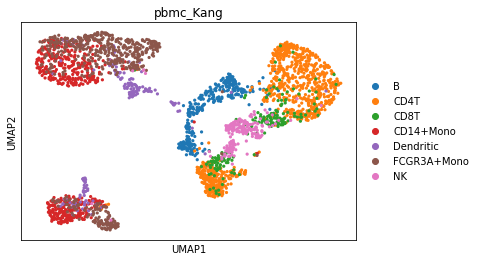

Defa24


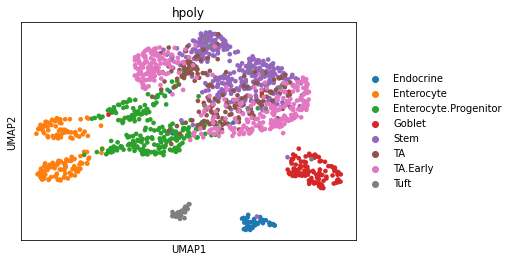

IFIT3


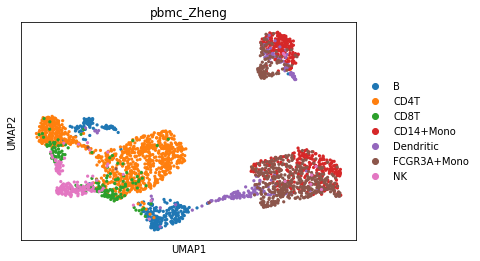

In [22]:
plot_umap(scperb_pbmc_adata, "pbmc_Kang")
plot_umap(scperb_hpoly_adata, "hpoly")
plot_umap(scperb_study_adata, "pbmc_Zheng")

In [10]:
# import numpy as np
ctrl_pbmc = scperb_pbmc_adata[scperb_pbmc_adata.obs['condition'] == 'control']
ctrl_pbmc[:,"IFI6"].X.mean()

0.15038416

In [11]:
pred_pbmc = scperb_pbmc_adata[scperb_pbmc_adata.obs['condition'] == 'pred']
pred_pbmc[:,"IFI6"].X.mean()

1.7168136

In [12]:
# plot_umap(scperb_pbmc_adata, "pbmc_scgen")
# plot_umap(scperb_hpoly_adata, "hpoly_scgen")
# plot_umap(scperb_study_adata, "study_scgen")

In [13]:
def plot_cell_type_umap(adata, cell_type, name):
    condition = get_name(name)
    cell_type_adata = adata[adata.obs[condition['cell_type_key']] == cell_type]
    plot_umap(cell_type_adata, name, cell_type)

In [14]:
def plot_all_cell_umap(adata, name):
    for cell_type in names[name]:
        plot_cell_type_umap(adata, cell_type,name)

/Users/tongtongtot/opt/anaconda3/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:580: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


IFI6


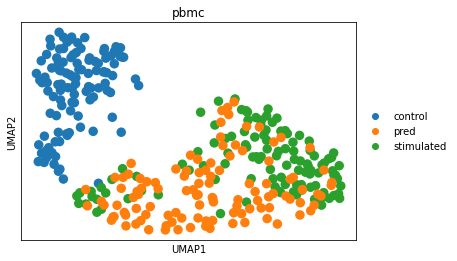

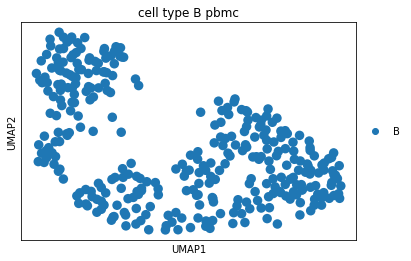

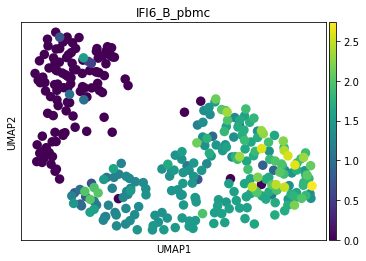

/Users/tongtongtot/opt/anaconda3/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:580: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


IFIT3


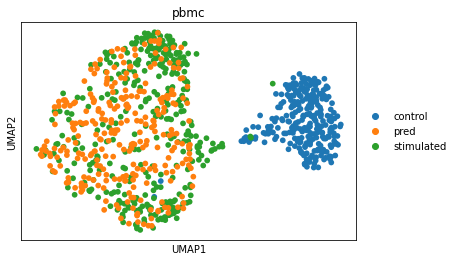

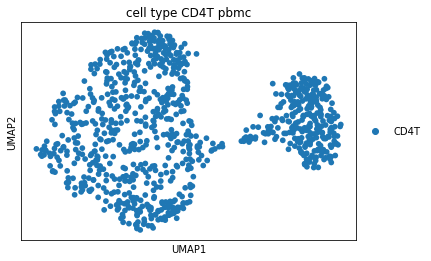

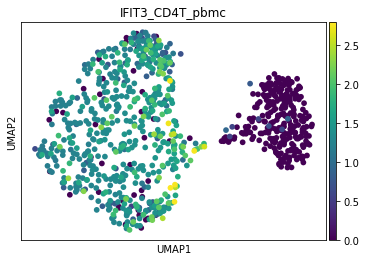

/Users/tongtongtot/opt/anaconda3/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:580: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


IFI6


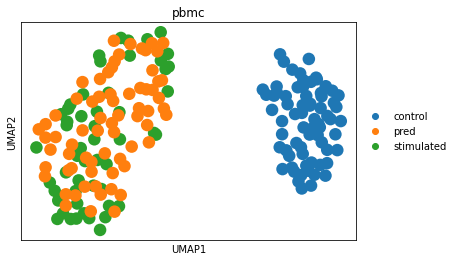

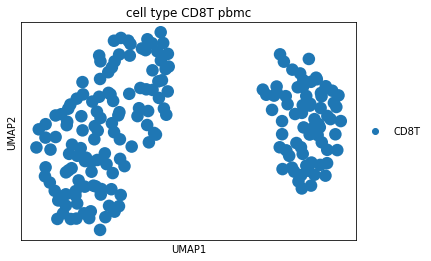

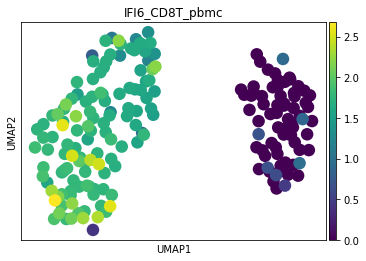

/Users/tongtongtot/opt/anaconda3/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:580: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


CXCL11


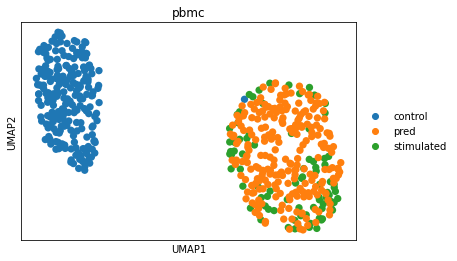

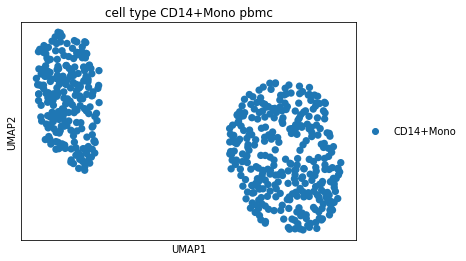

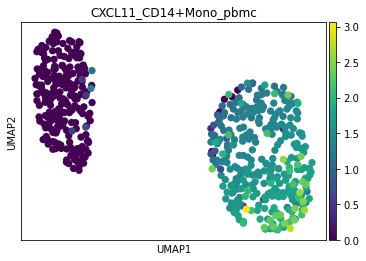

/Users/tongtongtot/opt/anaconda3/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:580: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


IFITM3


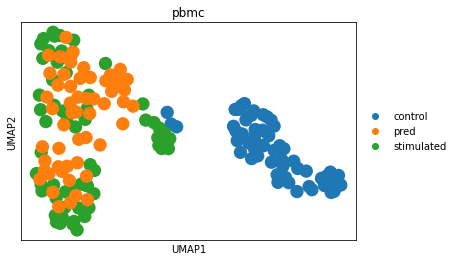

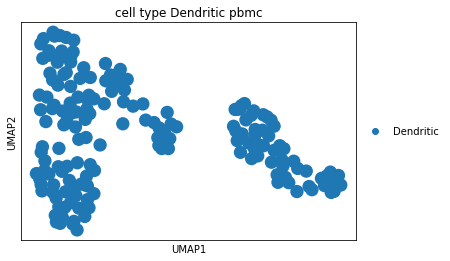

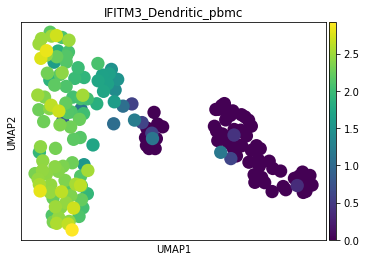

/Users/tongtongtot/opt/anaconda3/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:580: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


ISG15


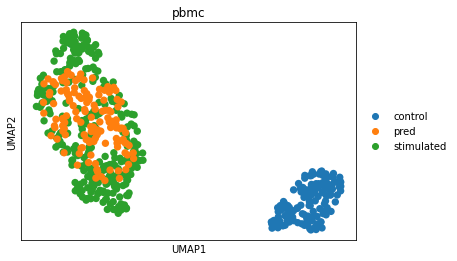

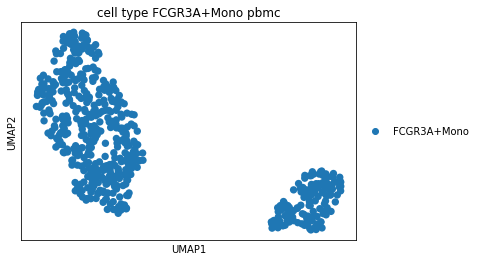

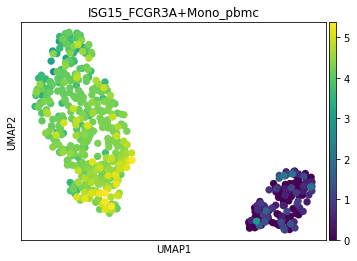

/Users/tongtongtot/opt/anaconda3/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:580: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


B2M


KeyboardInterrupt: 

In [15]:
plot_all_cell_umap(scperb_pbmc_adata, "pbmc")
plot_all_cell_umap(scperb_hpoly_adata, "hpoly")
plot_all_cell_umap(scperb_study_adata, "study")